**First we built our basic model with Relu activation function.**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

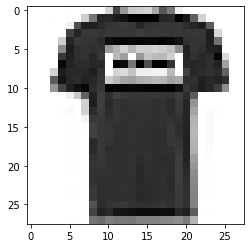

In [4]:
plt.imshow(X_train[1], cmap = plt.cm.binary) # (use cmap for remove extra color)
plt.show()

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [7]:
class_names[Y_train[0]]

'Ankle boot'

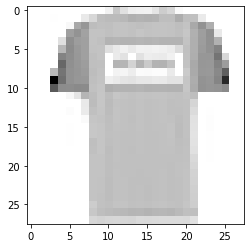

In [8]:
plt.imshow(X_train[1], cmap = plt.cm.binary) # (use cmap for remove extra color)
plt.show()

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
# model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))


In [11]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
#complie
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(lr=1e-3), metrics = ["accuracy"])

In [13]:
#fit
history=model.fit(X_train,Y_train,epochs = 40, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 6s 131us/sample - loss: 2.1289 - accuracy: 0.3715 - val_loss: 1.9213 - val_accuracy: 0.5441
Epoch 2/40
48000/48000 [==============================] - 3s 65us/sample - loss: 1.6857 - accuracy: 0.5980 - val_loss: 1.4577 - val_accuracy: 0.6422
Epoch 3/40
48000/48000 [==============================] - 3s 58us/sample - loss: 1.2873 - accuracy: 0.6615 - val_loss: 1.1393 - val_accuracy: 0.6845
Epoch 4/40
48000/48000 [==============================] - 3s 59us/sample - loss: 1.0423 - accuracy: 0.6895 - val_loss: 0.9540 - val_accuracy: 0.7057
Epoch 5/40
48000/48000 [==============================] - 5s 109us/sample - loss: 0.9021 - accuracy: 0.7110 - val_loss: 0.8474 - val_accuracy: 0.7243
Epoch 6/40
48000/48000 [==============================] - 4s 89us/sample - loss: 0.8171 - accuracy: 0.7277 - val_loss: 0.7791 - val_accuracy: 0.7390
Epoch 7/40
48000/48000 [==============================

As we see our accuracy increases with epochs so we need to run more epochs

**At 40 epochs it's validation accuracy is 83.92% and still increases if we run more epochs.**

In [14]:
history.params

{'batch_size': 32,
 'epochs': 40,
 'steps': 1500,
 'samples': 48000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [15]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

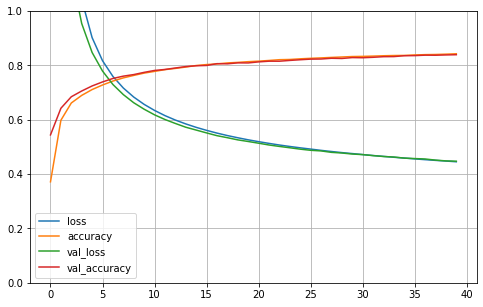

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 109us/sample - loss: 0.4777 - accuracy: 0.8294


[0.47774217162132265, 0.8294]

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.24, 0.01, 0.63],
       [0.  , 0.  , 0.82, 0.  , 0.04, 0.  , 0.14, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [20]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [21]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [22]:
y_new = Y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

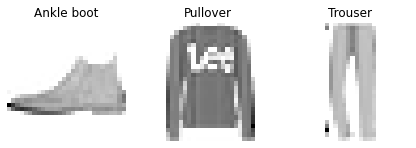

In [23]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[Y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Training Deep Neural Networks<br>Now we improve our model by adding new features.

**Initialization**

Initizer according to activation function<br>

Glorot-- None,tanh,logistic,softmax<br>
He-- Relu and variants<br>
LeCun-- SELU

In [24]:
#like keras.layers.Dense(10, activation = "relu", kernel_initializer= "he_normal")

**There are differnt type of Relu**<br>
LeakyRelu(mostly use)<br>
PRelu(used in big image data)<br>
ELU and SELU

**Try LeakyRelu**

In [25]:


model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
#summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

In [27]:
#complie
model2.compile(loss="sparse_categorical_crossentropy",optimizer= keras.optimizers.SGD(lr=1e-3), metrics = ["accuracy"])

In [66]:
#fit
history2=model2.fit(X_train,Y_train,epochs = 40, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 3s 68us/sample - loss: 0.4455 - accuracy: 0.8408 - val_loss: 0.4474 - val_accuracy: 0.8363
Epoch 2/40
48000/48000 [==============================] - 3s 62us/sample - loss: 0.4434 - accuracy: 0.8421 - val_loss: 0.4448 - val_accuracy: 0.8388
Epoch 3/40
48000/48000 [==============================] - 3s 71us/sample - loss: 0.4413 - accuracy: 0.8426 - val_loss: 0.4433 - val_accuracy: 0.8389
Epoch 4/40
48000/48000 [==============================] - 3s 72us/sample - loss: 0.4390 - accuracy: 0.8434 - val_loss: 0.4413 - val_accuracy: 0.8403
Epoch 5/40
48000/48000 [==============================] - 3s 65us/sample - loss: 0.4374 - accuracy: 0.8443 - val_loss: 0.4390 - val_accuracy: 0.8408
Epoch 6/40
48000/48000 [==============================] - 3s 64us/sample - loss: 0.4353 - accuracy: 0.8452 - val_loss: 0.4377 - val_accuracy: 0.8405
Epoch 7/40
48000/48000 [==============================] 

**Due to some changes in Activation function and initilazer we achive 85.65%.**

In [29]:
history2.params

{'batch_size': 32,
 'epochs': 40,
 'steps': 1500,
 'samples': 48000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [30]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

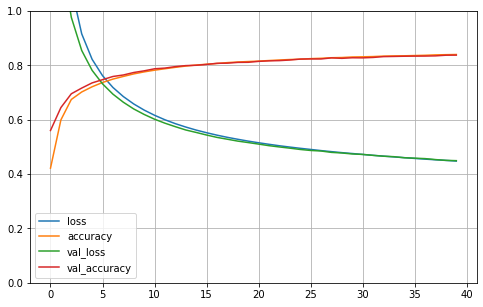

In [31]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model2.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.4817 - accuracy: 0.8311


[0.48170896396636964, 0.8311]

In [33]:
X_new2 = X_test[:3]
y_proba = model2.predict(X_new2)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.22, 0.  , 0.67],
       [0.  , 0.  , 0.86, 0.  , 0.02, 0.  , 0.11, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred2 = model2.predict_classes(X_new2)
y_pred2

array([9, 2, 1], dtype=int64)

In [35]:
np.array(class_names)[y_pred2]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = Y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

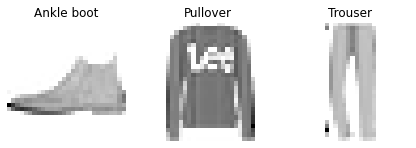

In [37]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new2):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[Y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Try PRelu**

In [38]:
#make new model
 
model3= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer= "he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [39]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
p_re_lu (PReLU)              (None, 300)               300       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 100)               100       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 267,010
Trainable params: 267,010
Non-trainable params: 0
________________________________________________

In [40]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [67]:
history3=model3.fit(X_train,Y_train,epochs = 39, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/39
48000/48000 [==============================] - 4s 74us/sample - loss: 0.4451 - accuracy: 0.8414 - val_loss: 0.4453 - val_accuracy: 0.8384
Epoch 2/39
48000/48000 [==============================] - 3s 64us/sample - loss: 0.4429 - accuracy: 0.8419 - val_loss: 0.4428 - val_accuracy: 0.8403
Epoch 3/39
48000/48000 [==============================] - 3s 68us/sample - loss: 0.4405 - accuracy: 0.8428 - val_loss: 0.4413 - val_accuracy: 0.8402
Epoch 4/39
48000/48000 [==============================] - 3s 67us/sample - loss: 0.4381 - accuracy: 0.8440 - val_loss: 0.4390 - val_accuracy: 0.8412
Epoch 5/39
48000/48000 [==============================] - 3s 69us/sample - loss: 0.4363 - accuracy: 0.8449 - val_loss: 0.4368 - val_accuracy: 0.8422
Epoch 6/39
48000/48000 [==============================] - 3s 71us/sample - loss: 0.4341 - accuracy: 0.8457 - val_loss: 0.4353 - val_accuracy: 0.8435
Epoch 7/39
48000/48000 [==============================] 

In [42]:
history3.params

{'batch_size': 32,
 'epochs': 39,
 'steps': 1500,
 'samples': 48000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

**Again change activation function model validation accuracy slightly increases 85.72%.**

In [43]:
history3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

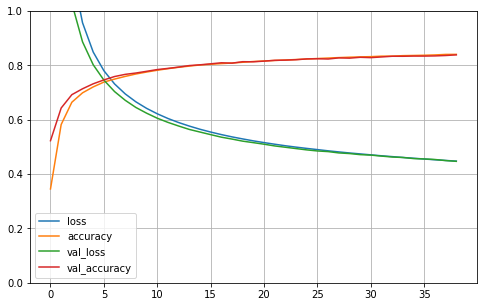

In [44]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
model3.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.4790 - accuracy: 0.8317


[0.4790028180599213, 0.8317]

**Batch Normalization**

**Now we have to select the position of Batch Normalization where we use this function (After activation or Before activation).**

**After activation **

In [46]:
batch_model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,kernel_initializer= "he_normal"),
    keras.layers.PReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,kernel_initializer= "he_normal"),
    keras.layers.PReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation="softmax")
])

In [47]:
batch_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 300)               300       
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 100)              

In [48]:
[(var.name,var.trainable)for var in batch_model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [49]:
batch_model.layers[1].updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [50]:
batch_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3,clipvalue=1.0),
              metrics=["accuracy"])

In [51]:
history_batch=batch_model.fit(X_train,Y_train,epochs = 39, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/39
48000/48000 [==============================] - 5s 100us/sample - loss: 0.9488 - accuracy: 0.6826 - val_loss: 0.6321 - val_accuracy: 0.7842
Epoch 2/39
48000/48000 [==============================] - 4s 82us/sample - loss: 0.6013 - accuracy: 0.7931 - val_loss: 0.5351 - val_accuracy: 0.8122
Epoch 3/39
48000/48000 [==============================] - 4s 83us/sample - loss: 0.5370 - accuracy: 0.8139 - val_loss: 0.4914 - val_accuracy: 0.8273
Epoch 4/39
48000/48000 [==============================] - 4s 86us/sample - loss: 0.5027 - accuracy: 0.8234 - val_loss: 0.4660 - val_accuracy: 0.8340
Epoch 5/39
48000/48000 [==============================] - 4s 86us/sample - loss: 0.4749 - accuracy: 0.8321 - val_loss: 0.4465 - val_accuracy: 0.8415
Epoch 6/39
48000/48000 [==============================] - 4s 86us/sample - loss: 0.4578 - accuracy: 0.8388 - val_loss: 0.4327 - val_accuracy: 0.8457
Epoch 7/39
48000/48000 [==============================]

In [52]:
history_batch.params

{'batch_size': 32,
 'epochs': 39,
 'steps': 1500,
 'samples': 48000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [53]:
history_batch.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

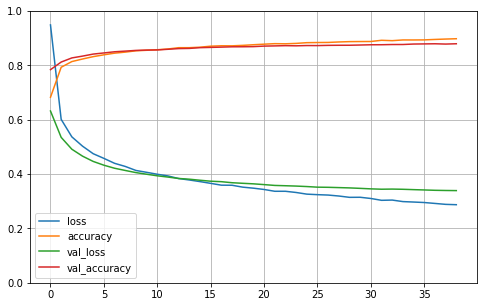

In [54]:
pd.DataFrame(history_batch.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
batch_model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3587 - accuracy: 0.8693


[0.35870675404071806, 0.8693]

**Before activation**

In [56]:
batch_model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.PReLU(),
    keras.layers.Dense(100,kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [57]:
batch_model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 300)               300       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [58]:
[(var.name,var.trainable)for var in batch_model3.layers[1].variables]

[('batch_normalization_3/gamma:0', True),
 ('batch_normalization_3/beta:0', True),
 ('batch_normalization_3/moving_mean:0', False),
 ('batch_normalization_3/moving_variance:0', False)]

In [59]:
batch_model3.layers[1].updates

[<tf.Operation 'cond_2/Identity' type=Identity>,
 <tf.Operation 'cond_3/Identity' type=Identity>]

In [60]:
batch_model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3,clipvalue=1.0),
              metrics=["accuracy"])

In [61]:
history_batch2=batch_model3.fit(X_train,Y_train,epochs = 39, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/39
48000/48000 [==============================] - 5s 99us/sample - loss: 1.1231 - accuracy: 0.6381 - val_loss: 0.7373 - val_accuracy: 0.7613
Epoch 2/39
48000/48000 [==============================] - 4s 83us/sample - loss: 0.7046 - accuracy: 0.7700 - val_loss: 0.6120 - val_accuracy: 0.7952
Epoch 3/39
48000/48000 [==============================] - 4s 88us/sample - loss: 0.6202 - accuracy: 0.7934 - val_loss: 0.5556 - val_accuracy: 0.8123
Epoch 4/39
48000/48000 [==============================] - 4s 84us/sample - loss: 0.5776 - accuracy: 0.8037 - val_loss: 0.5202 - val_accuracy: 0.8197
Epoch 5/39
48000/48000 [==============================] - 4s 85us/sample - loss: 0.5425 - accuracy: 0.8142 - val_loss: 0.4954 - val_accuracy: 0.8255
Epoch 6/39
48000/48000 [==============================] - 4s 84us/sample - loss: 0.5192 - accuracy: 0.8210 - val_loss: 0.4746 - val_accuracy: 0.8325
Epoch 7/39
48000/48000 [==============================] 

In [62]:
history_batch2.params

{'batch_size': 32,
 'epochs': 39,
 'steps': 1500,
 'samples': 48000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [63]:
history_batch2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

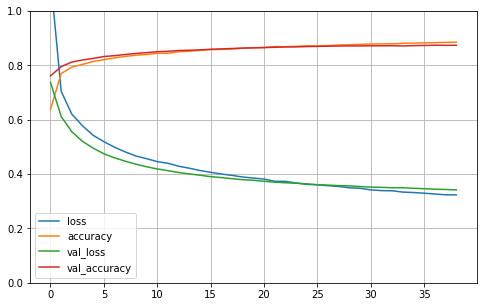

In [64]:
pd.DataFrame(history_batch2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [65]:
batch_model3.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.3647 - accuracy: 0.8691


[0.364662722158432, 0.8691]

**Last we found that for this model Bacth Normalization is perfect when we use it before activation function**

**After all the test we found that for this model we should use (PRelu activation function , he_normal for kernel_initializer and use Batch Normalization before activation function).**

**There are more other methods for discuss in next file like(Transfer learning, Relularization, Keras Tuner)etc.**